In [4]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15320, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15320 (delta 0), reused 0 (delta 0), pack-reused 15319
Receiving objects: 100% (15320/15320), 13.90 MiB | 1.87 MiB/s, done.
Resolving deltas: 100% (10372/10372), done.


In [5]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [6]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [49]:
!make

chmod +x *.sh


In [8]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-10-28 05:17:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.4MB/s    in 11s     

2021-10-28 05:17:45 (21.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [9]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [10]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

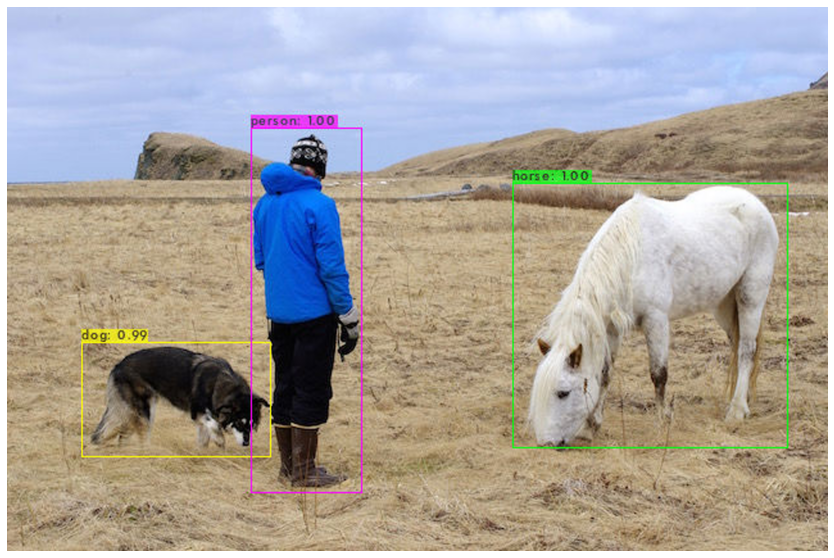

In [ ]:
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

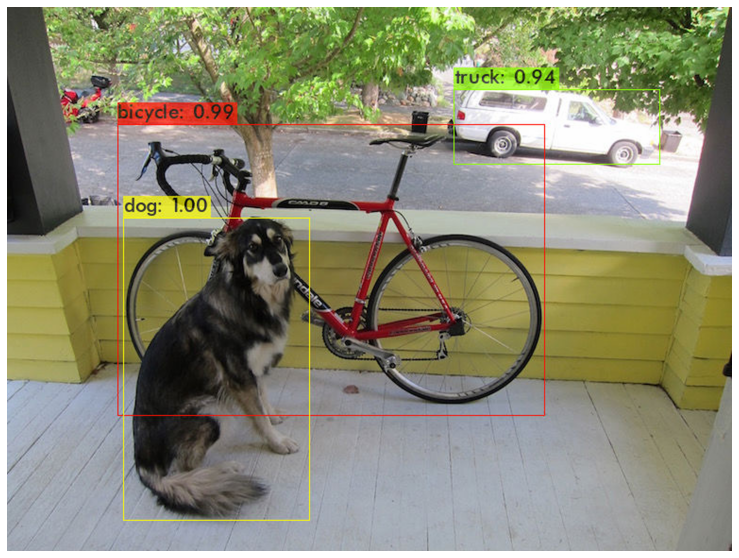

In [11]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [12]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [13]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/mydrive


/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

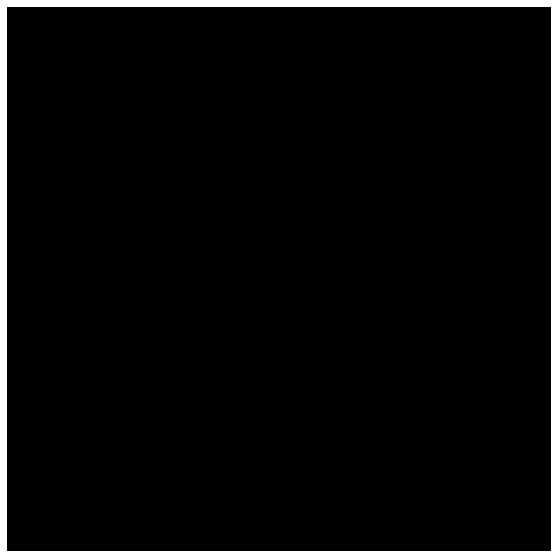

In [14]:
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/plane.jpg
imShow('predictions.jpg')

In [15]:
!cp /content/drive/MyDrive/obj.zip ../

In [16]:
!unzip ../obj.zip -d /content/darknet/data/

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000103.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000103.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000104.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000104.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000105.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000105.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000107.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000107.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000108.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000108.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000109.

In [ ]:
# !cp /content/darknet/cfg/yolov3.cfg /content/drive/MyDrive/yolov3

In [17]:
!cp /content/drive/MyDrive/yolov3/obj.names /content/darknet/data
!cp /content/drive/MyDrive/yolov3/obj.data  /content/darknet/data

In [ ]:
# !cp /content/drive/MyDrive/generate_train.py ./

In [18]:
!cp /content/drive/MyDrive/generate_train.py /content/darknet

In [19]:
!cp /content/drive/MyDrive/yolov3/yolov3_custom.cfg /content/darknet/cfg

In [20]:
!cd /content/darknet

In [21]:
!python /content/darknet/generate_train.py

In [22]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-10-28 05:20:33--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.0MB/s    in 7.4s    

2021-10-28 05:20:41 (21.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [23]:
!cd /content/darknet 

In [ ]:
!ls

3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       obj.zip
build.ps1		generate_train.py      README.md
cfg			image_yolov3.sh        results
cmake			image_yolov4.sh        scripts
CMakeLists.txt		include		       src
darknet53.conv.74	json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


In [ ]:
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

流式输出内容被截断，只能显示最后 5000 行内容。
 total_bbox = 423224, rewritten_bbox = 0.000000 % 

 3962: 0.191560, 0.179123 avg loss, 0.000010 rate, 10.648984 seconds, 507136 images, 0.276000 hours left
Loaded: 0.000121 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.806466), count: 2, class_loss = 0.001393, iou_loss = 0.182620, total_loss = 0.184013 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.005489, iou_loss = 0.000000, total_loss = 0.005489 
 total_bbox = 423226, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.859935), count: 3, class_loss = 0.042484, iou_loss = 0.067396, total_loss = 0.109879 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 

In [ ]:
!./darknet detector valid /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
results: Using default 'results'
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcu

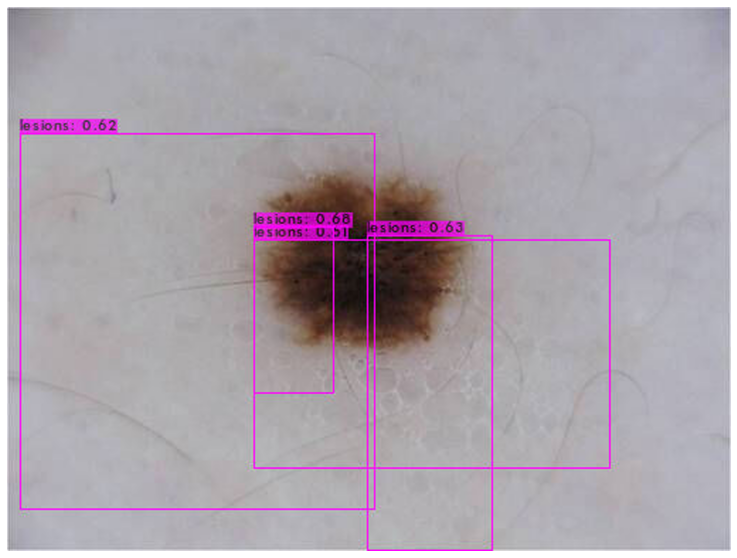

In [ ]:
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/results/backup/yolov3_custom_last.weights /content/darknet/data/obj/ISIC_0000001.jpg -thresh 0.6
imShow('predictions.jpg')

In [ ]:
!cp /content/darknet/results/comp4_det_test_lesions.txt /content/drive/MyDrive

In [36]:
!cd /content/darknet

In [37]:
!ls

3rdparty	darknet53.conv.74	include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  result.txt
bad.list	darknet_images.py	LICENSE		       scripts
build		darknet.py		Makefile	       src
build.ps1	darknet_video.py	net_cam_v3.sh	       vcpkg.json
cfg		data			net_cam_v4.sh	       video_yolov3.sh
cmake		generate_train.py	obj		       video_yolov4.sh
CMakeLists.txt	image_yolov3.sh		predictions.jpg        yolov3.weights
darknet		image_yolov4.sh		README.md	        result.txt


In [51]:
!./darknet detector test  /content/darknet/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolov3/backup/yolov3_custom_last.weights /content/darknet/data/train.txt /content/darknet/result.txt

/bin/bash: ./darknet detector test  /content/darknet/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolov3/backup/yolov3_custom_last.weights /content/darknet/data/train.txt /content/darknet/result.txt: No such file or directory


In [48]:
!/content/darknet/darknet detector test </content/darknet/data/obj.data> </content/darknet/cfg/yolov3_custom.cfg> </content/drive/MyDrive/yolov3/backup/yolov3_custom_last.weights> -dont_show -ext_output </content/darknet/test.txt> </content/darknet/result.txt>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `/content/darknet/darknet detector test </content/darknet/data/obj.data> </content/darknet/cfg/yolov3_custom.cfg> </content/drive/MyDrive/yolov3/backup/yolov3_custom_last.weights> -dont_show -ext_output </content/darknet/test.txt> </content/darknet/result.txt>'


In [41]:
!ls /content/darknet/

3rdparty	darknet53.conv.74	include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  result.txt
bad.list	darknet_images.py	LICENSE		       scripts
build		darknet.py		Makefile	       src
build.ps1	darknet_video.py	net_cam_v3.sh	       vcpkg.json
cfg		data			net_cam_v4.sh	       video_yolov3.sh
cmake		generate_train.py	obj		       video_yolov4.sh
CMakeLists.txt	image_yolov3.sh		predictions.jpg        yolov3.weights
darknet		image_yolov4.sh		README.md	        result.txt
